In [2]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
#importing the warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
Train_data=pd.read_csv('Doctor_train.csv')
Test_data=pd.read_csv('Doctor_test.csv')

In [4]:
Train_data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [5]:
Test_data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [6]:
#Checking the columns
print('Train_data:',Train_data.shape)
print('/n')
print('Test_data:',Test_data.shape)

Train_data: (5961, 7)
/n
Test_data: (1987, 6)


# TRAIN DATA¶

In [7]:
Train_data.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [8]:
Train_data.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

In [9]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [10]:
Train_data.isnull().values.any()

True

In [11]:
#Checking for null values
Train_data.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [12]:
#for col in['Number_Weeks_Used']:Train_data[col].fillna(Train_data[col].mode()[0],inplace=True)
Train_data.dropna(inplace=True)

In [13]:
Train_data.isnull().values.any()

False

# SUMMARY STATISTICS

In [14]:
Train_data.describe()

,Fees
count,2577.000000
mean,343.440047
std,192.680230
min,50.000000
25%,200.000000
50%,300.000000
75%,500.000000
max,950.000000


# EXPLORATORY DATA ANALYSIS

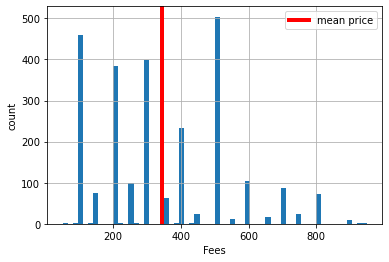

In [15]:
#Cheecking the mean price


price=Train_data['Fees'].hist(bins=60)
mean_val=np.mean(Train_data['Fees'])
plt.axvline(mean_val,linewidth=4, color='red',label='mean price')
plt.xlabel('Fees')
plt.ylabel('count')
plt.legend()
plt.show()

In [16]:
Train_data['Rating'].unique()

array(['100%', '98%', '99%', '79%', '95%', '97%', '94%', '88%', '90%',
       '80%', '93%', '36%', '78%', '87%', '96%', '82%', '89%', '74%',
       '86%', '92%', '83%', '76%', '85%', '56%', '91%', '68%', '60%',
       '75%', '69%', '73%', '67%', '77%', '33%', '55%', '71%', '84%',
       '45%', '63%', '72%', '81%', '62%', '57%', '7%', '48%', '40%',
       '64%', '70%', '65%', '47%', '58%', '53%'], dtype=object)

In [17]:
Train_data['Experience'].unique()

array(['24 years experience', '12 years experience',
       '20 years experience', '10 years experience', '9 years experience',
       '19 years experience', '21 years experience',
       '25 years experience', '15 years experience', '7 years experience',
       '14 years experience', '23 years experience',
       '31 years experience', '8 years experience', '22 years experience',
       '16 years experience', '11 years experience',
       '38 years experience', '6 years experience', '36 years experience',
       '13 years experience', '41 years experience',
       '40 years experience', '30 years experience',
       '26 years experience', '5 years experience', '34 years experience',
       '39 years experience', '35 years experience',
       '18 years experience', '17 years experience',
       '28 years experience', '27 years experience',
       '58 years experience', '46 years experience',
       '33 years experience', '44 years experience', '4 years experience',
       '29 years exp

In [18]:
Train_data['Place'].unique()

array(['Kakkanad, Ernakulam', 'Whitefield, Bangalore',
       'Keelkattalai, Chennai', 'Arekere, Bangalore',
       'Coimbatore Racecourse, Coimbatore', 'KPHB, Hyderabad',
       'HSR Layout, Bangalore', 'Pollachi, Coimbatore',
       'Kukatpally, Hyderabad', 'Defence Colony, Delhi',
       'Banjara Hills, Hyderabad', 'CR Park, Delhi',
       'Mogappair East, Chennai', 'Safdarjung Enclave, Delhi',
       'Borivali West, Mumbai', 'Saket, Delhi', 'Hyder Nagar, Hyderabad',
       'Dahisar West, Mumbai', 'RT Nagar, Bangalore', 'Powai, Mumbai',
       'Musheerabad, Hyderabad', 'Madhapur, Hyderabad',
       'Vileparle East, Mumbai', 'Yelahanka New Town, Bangalore',
       'Bannerghatta Road, Bangalore', 'Malleswaram, Bangalore',
       'Nallakunta, Hyderabad', 'Paschim Vihar, Delhi',
       'Andheri West, Mumbai', 'Himayat Nagar, Hyderabad',
       'Punjabi Bagh, Delhi', 'Attapur, Hyderabad',
       'Lakdikapul, Hyderabad', 'Ramnagar, Coimbatore',
       'Shalimar Bagh, Delhi', 'Girgaon, Mum

In [19]:
Train_data['Profile'].unique()

array(['Homeopath', 'Ayurveda', 'Dentist', 'ENT Specialist',
       'General Medicine', 'Dermatologists'], dtype=object)

In [20]:
Train_data['Miscellaneous_Info'].unique()

array(['100% 16 Feedback Kakkanad, Ernakulam',
       '98% 76 Feedback Whitefield, Bangalore',
       '100% 4 Feedback Keelkattalai, Chennai', ...,
       '98% 45 Feedback Basavanagudi, Bangalore',
       '97% 11 Feedback Greater Kailash Part 2, Delhi',
       'General Medical Consultation Viral Fever Treatment Infectious Disease Treatment'],
      dtype=object)

In [21]:
print(Train_data['Profile'].value_counts())

Dentist             862
Dermatologists      628
General Medicine    371
ENT Specialist      295
Homeopath           246
Ayurveda            175
Name: Profile, dtype: int64


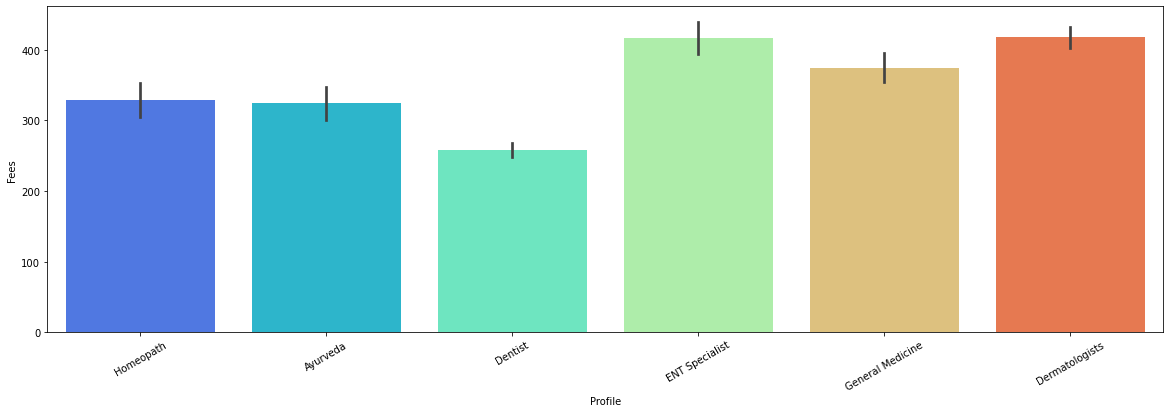

In [22]:
plt.figure(figsize=(20,6))
sn.barplot(x='Profile',y='Fees',data=Train_data,palette='rainbow')
plt.xticks(rotation=30)
plt.show()

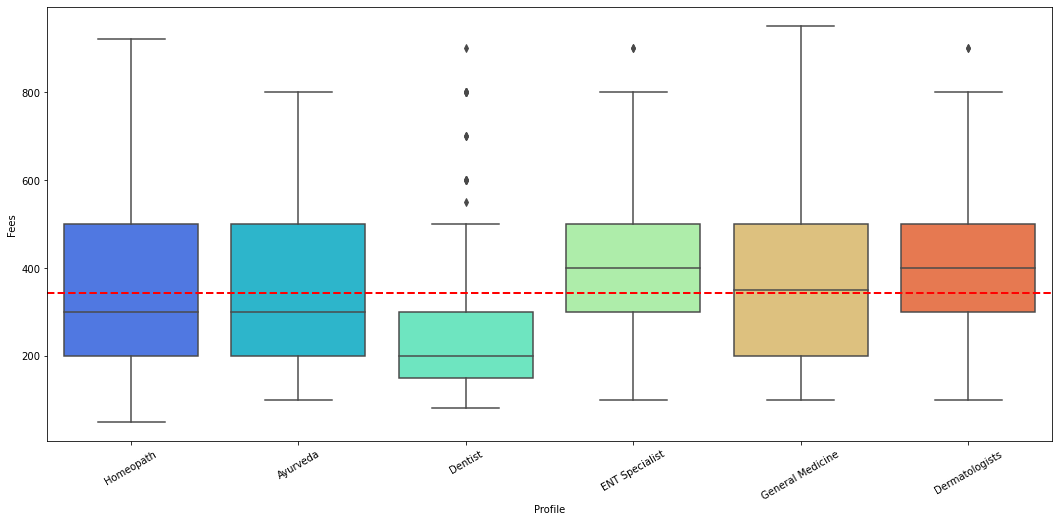

In [23]:
plt.figure(figsize=(18,8))
mean_price=np.mean(Train_data['Fees'])
sn.boxplot(x='Profile',y='Fees',data=Train_data,palette='rainbow')
plt.axhline(mean_price,color='r',linestyle='dashed',linewidth=2)
plt.xticks(rotation=30)
plt.show()

In [24]:
print(Train_data['Rating'].value_counts())

100%    654
98%     289
99%     258
97%     235
96%     216
95%     174
94%     111
93%      98
92%      65
90%      63
91%      58
88%      40
89%      40
85%      27
86%      21
82%      20
83%      20
80%      18
77%      15
87%      13
84%      12
81%      12
79%      12
67%      12
76%       9
73%       8
75%       8
71%       8
60%       7
74%       7
78%       6
56%       5
68%       5
69%       4
70%       3
72%       3
63%       2
64%       2
55%       2
57%       2
33%       2
62%       2
65%       1
47%       1
53%       1
58%       1
36%       1
40%       1
45%       1
48%       1
7%        1
Name: Rating, dtype: int64


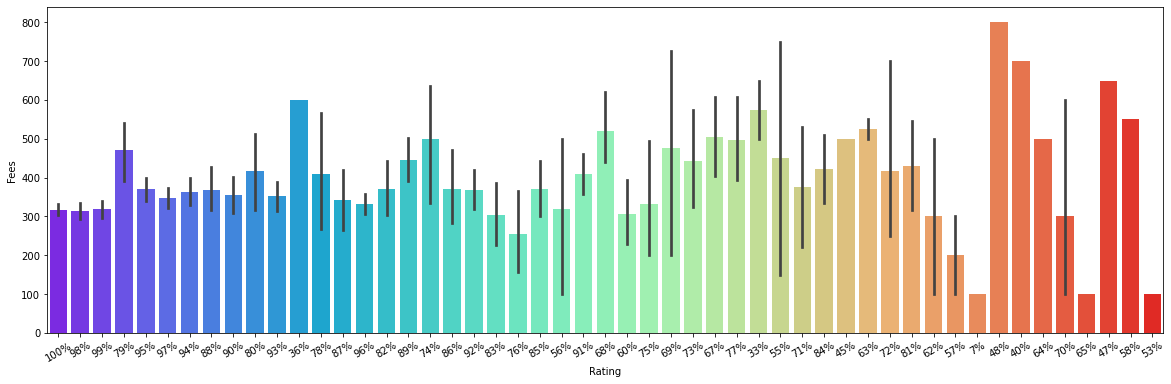

In [25]:
plt.figure(figsize=(20,6))
sn.barplot(x='Rating',y='Fees',data=Train_data,palette='rainbow')
plt.xticks(rotation=30)
plt.show()

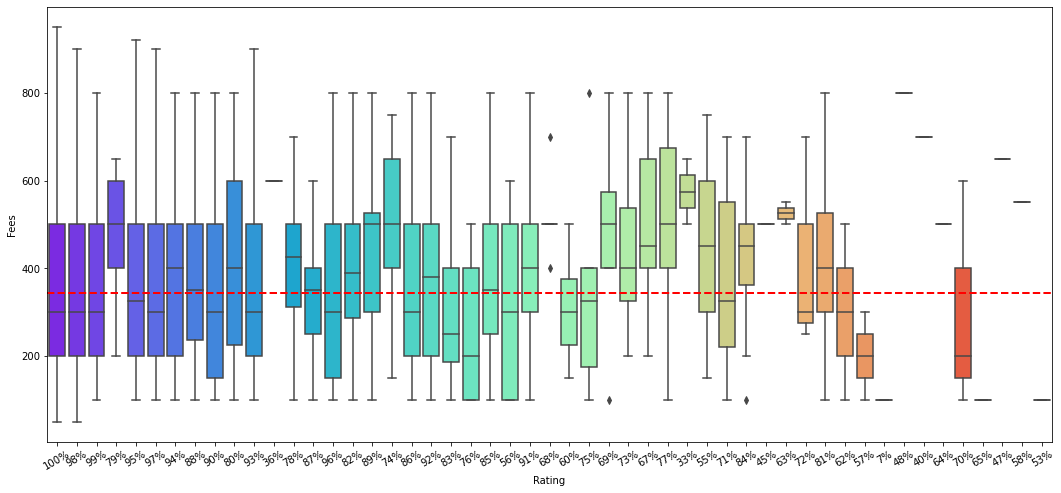

In [26]:
plt.figure(figsize=(18,8))
mean_price=np.mean(Train_data['Fees'])
sn.boxplot(x='Rating',y='Fees',data=Train_data,palette='rainbow')
plt.axhline(mean_price,color='r',linestyle='dashed',linewidth=2)
plt.xticks(rotation=30)
plt.show()

In [27]:
print(Train_data['Miscellaneous_Info'].value_counts())

Acrylic Partial Denture Crowns and Bridges Fixing Artificial Teeth                          38
Tooth Extraction Dental Fillings Scaling / Polishing                                        10
Skin Disease Treatment Kidney Stone Treatment Gall Bladder (Biliary) Stone Treatment         8
Cosmetic/ Aesthetic Dentistry Crowns and Bridges Fixing Complete/Partial Dentures Fixing     8
Crowns and Bridges Fixing Impaction / Impacted Tooth Extraction Conservative Dentistry       7
                                                                                            ..
100% 25 Feedback Saket, Delhi                                                                1
100% 5 Feedback Banashankari 2nd Stage, Bangalore                                            1
Dental Implant Fixing Crowns and Bridges Fixing Dental Fillings                              1
97% 102 Feedback Dwarka, Delhi                                                               1
Dental X-Ray Dental prophylaxis Dental Laminates  

In [28]:
print(Train_data['Place'].value_counts())

HSR Layout, Bangalore             45
Dwarka, Delhi                     37
Banjara Hills, Hyderabad          33
Indiranagar, Bangalore            32
Andheri West, Mumbai              30
                                  ..
Vadavalli, Coimbatore              1
Koramangala 8 Block, Bangalore     1
Jayanagar 7 Block, Bangalore       1
Selaiyur, Chennai                  1
Cunningham Road, Bangalore         1
Name: Place, Length: 561, dtype: int64


In [29]:
#Converting Rating column

Rating=Train_data['Rating']
Rating=pd.get_dummies(Rating,drop_first=True)
Rating.head()

,33%,36%,40%,45%,47%,48%,53%,55%,56%,57%,...,90%,91%,92%,93%,94%,95%,96%,97%,98%,99%
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [30]:
#Converting Profile column

Profile=Train_data['Profile']
Profile=pd.get_dummies(Profile,drop_first=True)
Profile.head()

,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath
0,0,0,0,0,1
1,0,0,0,0,0
4,0,0,0,0,0
7,1,0,0,0,0
12,1,0,0,0,0


In [31]:
#Converting Qualification column

Qualification=Train_data['Qualification']
Qualification=pd.get_dummies(Qualification,drop_first=True)
Qualification.head()

,"B.Sc, MBBS, MD - General Medicine, Post Graduate Diploma in Diabetology (PGDD)",BAMS,"BAMS, Advance Diploma in Nutrition and Dietetics, Certificate in Yoga & Meditation","BAMS, CGO, Certified In Panchkarma","BAMS, Certificate Course In Therapeutic Yoga","BAMS, Certificate Course in Positive Psychology, Clinical Nutritionist certifcate","BAMS, Certification of Life Coach","BAMS, D.Y.A, Post Graduate Diploma in Emergency Services (PGDEMS), MD - Ayurveda Medicine","BAMS, DNHE","BAMS, DSM ( Siddha Medicine), Diploma in Emergency Medicine",...,"MS - Otorhinolaryngology, MBBS, DNB - ENT","MS - Otorhinolaryngology, MBBS, FICS","MS - Otorhinolaryngology, MBBS, Fellow of Advanced Micro ear Surgery, Fellowship in Head & Neck Oncology Surgery, Fellowship in Skull Base Surgery","MS - Otorhinolaryngology, MBBS, Fellowship In Laryngology Bronchoesophagology","Masters Diploma in Acupressure, BHMS, Certification in Nutrition and Weight Management","Member of the Royal College of Physicians, UK (MRCP UK), DNB - Internal Medicine, Diploma in Family Medicine (DFM), MBBS","PhD - Orthodontics & Dentofacial Orthopaedics, BDS","PhD - Orthodontics & Dentofacial Orthopaedics, BDS, MDS - Orthodontics","PhD - Orthodontics & Dentofacial Orthopaedics, MOrth","Post MD SR AIIMS, MD - Dermatology, MBBS"
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
#Converting Experience column

Experience=Train_data['Experience']
Experience=pd.get_dummies(Experience,drop_first=True)
Experience.head()

,10 years experience,11 years experience,12 years experience,13 years experience,14 years experience,15 years experience,16 years experience,17 years experience,18 years experience,19 years experience,...,50 years experience,51 years experience,52 years experience,53 years experience,56 years experience,58 years experience,6 years experience,7 years experience,8 years experience,9 years experience
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [33]:
#Converting Place column

Place=Train_data['Place']
Place=pd.get_dummies(Place,drop_first=True)
Place.head()

,"AS Rao Nagar, Hyderabad","Abbigere, Bangalore","Abids, Hyderabad","Adambakkam, Chennai","Adugodi, Bangalore","Adyar, Chennai","Agaram, Chennai","Akshaya nagar, Bangalore","Alaknanda, Delhi","Aluva, Ernakulam",...,"West Marredpally, Hyderabad","West Of Chord Road, Bangalore","Whitefield, Bangalore","Wilson Garden, Bangalore","Worli, Mumbai","Yamuna Vihar, Delhi","Yelahanka New Town, Bangalore","Yelahanka, Bangalore","Yeshwanthpur, Bangalore","Yousufguda, Hyderabad"
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
Train_data.drop(['Miscellaneous_Info'],axis=1,inplace=True)

In [35]:
train=pd.concat([Train_data,Qualification,Experience,Rating,Place,Profile],axis=1)

In [36]:
train.head()

,Qualification,Experience,Rating,Place,Profile,Fees,"B.Sc, MBBS, MD - General Medicine, Post Graduate Diploma in Diabetology (PGDD)",BAMS,"BAMS, Advance Diploma in Nutrition and Dietetics, Certificate in Yoga & Meditation","BAMS, CGO, Certified In Panchkarma",...,"Yamuna Vihar, Delhi","Yelahanka New Town, Bangalore","Yelahanka, Bangalore","Yeshwanthpur, Bangalore","Yousufguda, Hyderabad",Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,100,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,350,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,250,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,BDS,10 years experience,99%,"Arekere, Bangalore",Dentist,200,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
12,"BDS, MDS",9 years experience,98%,"Coimbatore Racecourse, Coimbatore",Dentist,200,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [37]:
train.drop(['Profile','Qualification','Experience','Rating','Place'],axis=1, inplace=True)
train.head()

,Fees,"B.Sc, MBBS, MD - General Medicine, Post Graduate Diploma in Diabetology (PGDD)",BAMS,"BAMS, Advance Diploma in Nutrition and Dietetics, Certificate in Yoga & Meditation","BAMS, CGO, Certified In Panchkarma","BAMS, Certificate Course In Therapeutic Yoga","BAMS, Certificate Course in Positive Psychology, Clinical Nutritionist certifcate","BAMS, Certification of Life Coach","BAMS, D.Y.A, Post Graduate Diploma in Emergency Services (PGDEMS), MD - Ayurveda Medicine","BAMS, DNHE",...,"Yamuna Vihar, Delhi","Yelahanka New Town, Bangalore","Yelahanka, Bangalore","Yeshwanthpur, Bangalore","Yousufguda, Hyderabad",Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath
0,100,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,350,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,250,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,200,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
12,200,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [38]:
Train_data.shape

(2577, 6)

# Test Data

In [39]:
Test_data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [40]:
Test_data.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info'],
      dtype='object')

In [41]:
Test_data.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
dtype: object

In [42]:
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
dtypes: object(6)
memory usage: 93.3+ KB


In [43]:
Test_data.isnull().values.any()

True

In [44]:
#for col in['Number_Weeks_Used']:Train_data[col].fillna(Train_data[col].mode()[0],inplace=True)
Test_data.dropna(inplace=True)

In [45]:
Test_data.isnull().values.any()

False

In [46]:
Test_data.describe()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
count,875,875,875,875,875,875
unique,393,52,36,366,6,841
top,BDS,10 years experience,100%,"Andheri West, Mumbai",Dentist,Acrylic Partial Denture Crowns and Bridges Fix...
freq,70,60,215,16,274,9


In [47]:
Test_data.shape

(875, 6)

In [48]:
Train_data.head()

,Qualification,Experience,Rating,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,350
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,250
7,BDS,10 years experience,99%,"Arekere, Bangalore",Dentist,200
12,"BDS, MDS",9 years experience,98%,"Coimbatore Racecourse, Coimbatore",Dentist,200


In [49]:
from sklearn.preprocessing import LabelEncoder
for column in Train_data.columns:
    if Train_data[column].dtype==np.number:
        continue
    else:
        Train_data[column]=LabelEncoder().fit_transform(Train_data[column])

In [50]:
Train_data.corr()

,Qualification,Experience,Rating,Place,Profile,Fees
Qualification,1.000000,0.004457,0.052745,-0.008174,0.433650,0.250633
Experience,0.004457,1.000000,-0.157775,-0.030889,0.000837,-0.028200
Rating,0.052745,-0.157775,1.000000,-0.001943,-0.032303,0.036680
Place,-0.008174,-0.030889,-0.001943,1.000000,-0.006823,-0.050995
Profile,0.433650,0.000837,-0.032303,-0.006823,1.000000,0.156419
Fees,0.250633,-0.028200,0.036680,-0.050995,0.156419,1.000000


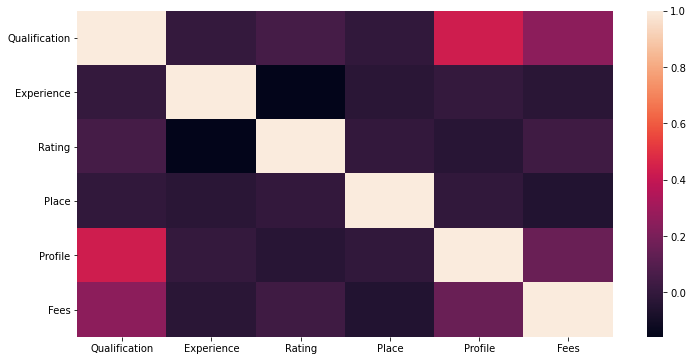

In [51]:
plt.figure(figsize=(12,6))
sn.heatmap(Train_data.corr())
plt.show()

Text(0.5, 1.0, 'Correlation with target Variable')

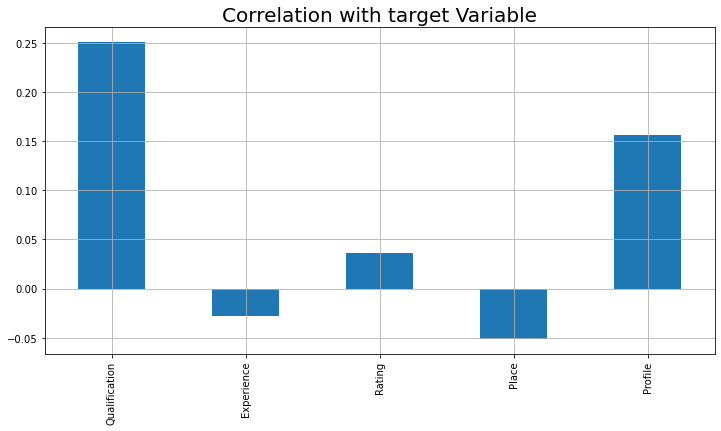

In [52]:
#Correlation with target column
plt.figure(figsize=(12,6))
Train_data.drop('Fees',axis=1).corrwith(Train_data['Fees']).plot(kind='bar',grid=True)
plt.xticks(rotation='vertical')
plt.title("Correlation with target Variable",fontsize=20)

In [53]:
from scipy.stats import zscore
z=np.abs(zscore(Train_data))
z

array([[0.43108501, 0.1864418 , 1.6165878 , 0.38294909, 1.91584723,
        1.35091811],
       [1.38429732, 0.89977973, 0.79922549, 1.74043907, 1.52802715,
        0.05553214],
       [1.48975911, 0.4059304 , 1.6165878 , 0.24341216, 1.52802715,
        0.47188671],
       ...,
       [0.04980009, 0.85612901, 0.74992318, 0.74695849, 1.22707235,
        1.2861761 ],
       [0.8101191 , 0.73516328, 0.40480699, 1.67977083, 1.22707235,
        1.35091811],
       [0.89755061, 0.62541899, 1.6165878 , 0.78794781, 0.83925227,
        0.82349927]])

In [54]:
threshold=3
print(np.where(z>3))

(array([], dtype=int64), array([], dtype=int64))


In [55]:
Train_new=Train_data[(z<3).all(axis=1)]

In [56]:
#Checking the shape
print(Train_data.shape,'\t\t',Train_new.shape)

(2577, 6) 		 (2577, 6)


In [57]:
Train_data=Train_new
Train_data.shape

(2577, 6)

# Feature Selection

In [58]:
Train_data.shape

(2577, 6)

In [59]:
Train_data.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile', 'Fees'], dtype='object')

In [60]:
x=Train_data.drop(columns=['Fees'],axis=1)
x.head()

,Qualification,Experience,Rating,Place,Profile
0,263,16,0,203,5
1,28,3,49,553,0
4,2,12,0,226,0
7,53,1,50,26,1
12,114,54,49,95,1


In [61]:
y=Train_data['Fees']
y.head()

0      2
1     10
4      7
7      5
12     5
Name: Fees, dtype: int64

In [62]:
#Checking the shapeof input and target variable
print(x.shape,'\t\t',y.shape)


(2577, 5) 		 (2577,)


In [63]:
#Scaling in input variables
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [64]:
#Splitting the data into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)


In [65]:
#Checking the shape
print(x_train.shape,'\t\t',x_test.shape)

(2061, 5) 		 (516, 5)


In [66]:
#Checking the shape
print(y_train.shape,'\t',y_test.shape)

(2061,) 	 (516,)


In [67]:
#import all the model library
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [68]:
#Importing Boosting models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [69]:
#Importing error metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV,cross_val_score

In [70]:
model=[LinearRegression(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),Lasso(),
      RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]
for m in model:
    m.fit(x_train,y_train)
    score=m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Score of',m,'is:',score)
    print("MAE",mean_absolute_error(y_test,predm))
    print("MSE",mean_squared_error(y_test,predm))
    print("RMSE",np.sqrt(mean_squared_error(y_test,predm)))
    print('R2_score:',r2_score(y_test,predm))
    print('********************************************')
    print('\n')
    
    

Score of LinearRegression() is: 0.07160050812591123
MAE 4.783828980573608
MSE 31.704641332018443
RMSE 5.630687465311713
R2_score: 0.05924130802304095
********************************************


Score of SVR() is: 0.092854364357293
MAE 4.478317805187021
MSE 30.3769923346763
RMSE 5.511532666570734
R2_score: 0.09863608688410186
********************************************


Score of DecisionTreeRegressor() is: 0.9999696897545635
MAE 5.782945736434108
MSE 58.666666666666664
RMSE 7.659416862050705
R2_score: -0.7407917035870755
********************************************


Score of KNeighborsRegressor() is: 0.3146356418779057
MAE 4.591085271317829
MSE 32.52968992248062
RMSE 5.703480509520535
R2_score: 0.034759982886687024
********************************************


Score of Lasso() is: 0.03260333686258532
MAE 4.890548271268564
MSE 32.69174288864662
RMSE 5.717669358107954
R2_score: 0.029951452334810003
********************************************


Score of RandomForestRegressor() is: 

In [71]:
#Cross validate all algorithm by using for loop

model=[LinearRegression(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),Lasso(),
      RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]
for m in model:
    score=cross_val_score(m,x,y,cv=10,scoring='r2')
    print("Model:",m)
    print("Score",score)
    print('Mean Score:',score.mean())
    print("Standard deviation:",score.std())
    print("******************************")
    print('\n')

Model: LinearRegression()
Score [0.06656606 0.07739822 0.10292365 0.06570824 0.07797941 0.05354716
 0.05456596 0.02322154 0.05793418 0.04597089]
Mean Score: 0.06258153022138715
Standard deviation: 0.020254276649487077
******************************


Model: SVR()
Score [ 0.06852404  0.07537363  0.13303766  0.07533132  0.09672781  0.06948592
  0.11253182 -0.0973513   0.06133257  0.00496935]
Mean Score: 0.059996280267029724
Standard deviation: 0.061535877982470205
******************************


Model: DecisionTreeRegressor()
Score [-0.63324457 -0.46710463 -0.5597828  -0.63358146 -0.75685158 -0.65277596
 -0.71595646 -0.76553474 -0.34613306 -0.55078138]
Mean Score: -0.6081746632706696
Standard deviation: 0.12487975561143261
******************************


Model: KNeighborsRegressor()
Score [-0.08321784  0.01348894  0.00726991 -0.0747924   0.0023229   0.12298426
  0.06646178 -0.09974699  0.04264275 -0.16804122]
Mean Score: -0.01706279197923575
Standard deviation: 0.08330422332038302
****

In [76]:
from sklearn.model_selection import GridSearchCV
parameters={'n_estimators':[400,500,600,700],'max_depth':[4,5,6,15,20]}
RFC=RandomForestRegressor()
clf=GridSearchCV(RFC,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'max_depth': 6, 'n_estimators': 600}


In [81]:
#Using Random Forest Regressor with its parameters
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=400,min_samples_split=15,min_samples_leaf=1,max_features='auto',max_depth=20)
rf.fit(x_train,y_train)
print('Score:',rf.score(x_train,y_train))
y_pred=rf.predict(x_test)
print('\n')
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_score:',r2_score(y_test,y_pred))
print('********************************************')
print('\n')

Score: 0.5721488478573848


MAE 4.317442337008845
MSE 27.7743957612474
RMSE 5.2701419109211285
R2_score: 0.17586185715925828
********************************************




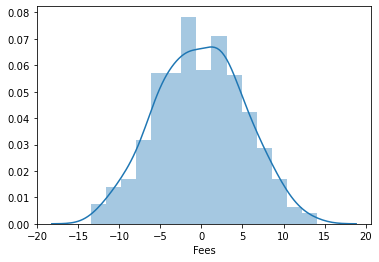

In [82]:
sn.distplot(y_test-y_pred)
plt.show()

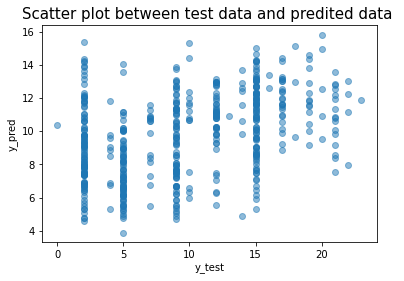

In [83]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.title("Scatter plot between test data and predited data ",fontsize=15)
plt.show()